In [46]:
import pandas as pd
import seaborn as sns
import importlib
import os
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import umap
import pickle
import sklearn                                     
import sys
sys.path.append('/Users/yiquntchen/Desktop/gene-embedding-perturbation/')
# Reload the module
import utils
import GenePertExperiment
importlib.reload(utils)
# Reload the module
importlib.reload(GenePertExperiment)
from utils import get_best_overall_mse_corr, run_experiments_with_embeddings, plot_mse_corr_comparison, compare_embedding_correlations
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Arial"
import scanpy as sc

In [50]:
# Example usage
embedding_pairs = [
    ("GenePT Model 3 Embedding", "/Users/yiquntchen/Downloads/data_embedding/GPT_model_3_gene_and_protein.pickle"),
    ("GenePT Model 3 name only", "/Users/yiquntchen/Desktop/gene-embedding-perturbation/GPT_model_3_gene_embeddings_NAME_ONLY.pickle"),
    ("GenePT Ada name only", "/Users/yiquntchen/Desktop/gene-embedding-perturbation/GPT_ada_gene_embeddings_NAME_ONLY.pickle"),
    ("GenePT Ada Embedding", "/Users/yiquntchen/Downloads/data_embedding/GPT_3_5_gene_embeddings_augment.pickle"),
    ("ESM2 protein embedding", "/Users/yiquntchen/Downloads/data_embedding/ESM2_protein_embedding.pkl"),
    ("Geneformer", "/Users/yiquntchen/Downloads/gene_to_geneformer_embed.pkl"),
    ("scGPT", "/Users/yiquntchen/Downloads/all_scgpt_gene_embeddings.pkl"),
    ("genept_and_esm2 Embedding", "/Users/yiquntchen/Downloads/data_embedding/genept_and_esm2.pickle"),
]

# Initialize the PerturbSeqExperiment with one embedding (this will be updated later)
experiment = GenePertExperiment.GenePertExperiment(embeddings=None)

# Load the dataset once
dataset_path = "/Users/yiquntchen/Downloads/replogle_k562_essential/perturb_processed.h5ad"
experiment.load_dataset(dataset_path)

# Run experiments with different embeddings
results_comparison = run_experiments_with_embeddings(
    experiment=experiment,
    embedding_pairs=embedding_pairs,
    ridge_params=[{'alpha': 0.1}, {'alpha': 1.0}, {'alpha': 10.0}],  # Ridge hyperparameters
    knn_params=[{'n_neighbors': 3}, {'n_neighbors': 10}, {'n_neighbors': 20}],  # KNN hyperparameters
    k=5,  # 5-fold cross-validation,
    mlp_epochs = 80,
)

Running experiment for embedding: GenePT Model 3 Embedding
Running fold 1/5...
Running fold 2/5...
Running fold 3/5...
Running fold 4/5...
Running fold 5/5...
Finished experiment for embedding: GenePT Model 3 Embedding
Best MSE for GenePT Model 3 Embedding: ('train_condition', 'mean', 0.07903034, 0.0010931027)
Best Correlation for GenePT Model 3 Embedding: ('train_condition', 'mean', 0.3815867934197222, 0.009858877384423193)
Running experiment for embedding: Geneformer
Running fold 1/5...
Running fold 2/5...
Running fold 3/5...
Running fold 4/5...
Running fold 5/5...
Finished experiment for embedding: Geneformer
Best MSE for Geneformer: ('ridge', (('alpha', 10.0),), 0.07684225562556088, 0.0012172587326665077)
Best Correlation for Geneformer: ('ridge', (('alpha', 10.0),), 0.4171745562139506, 0.00851470898571348)
Running experiment for embedding: scGPT
Running fold 1/5...
Running fold 2/5...
Running fold 3/5...
Running fold 4/5...
Running fold 5/5...
Finished experiment for embedding: sc

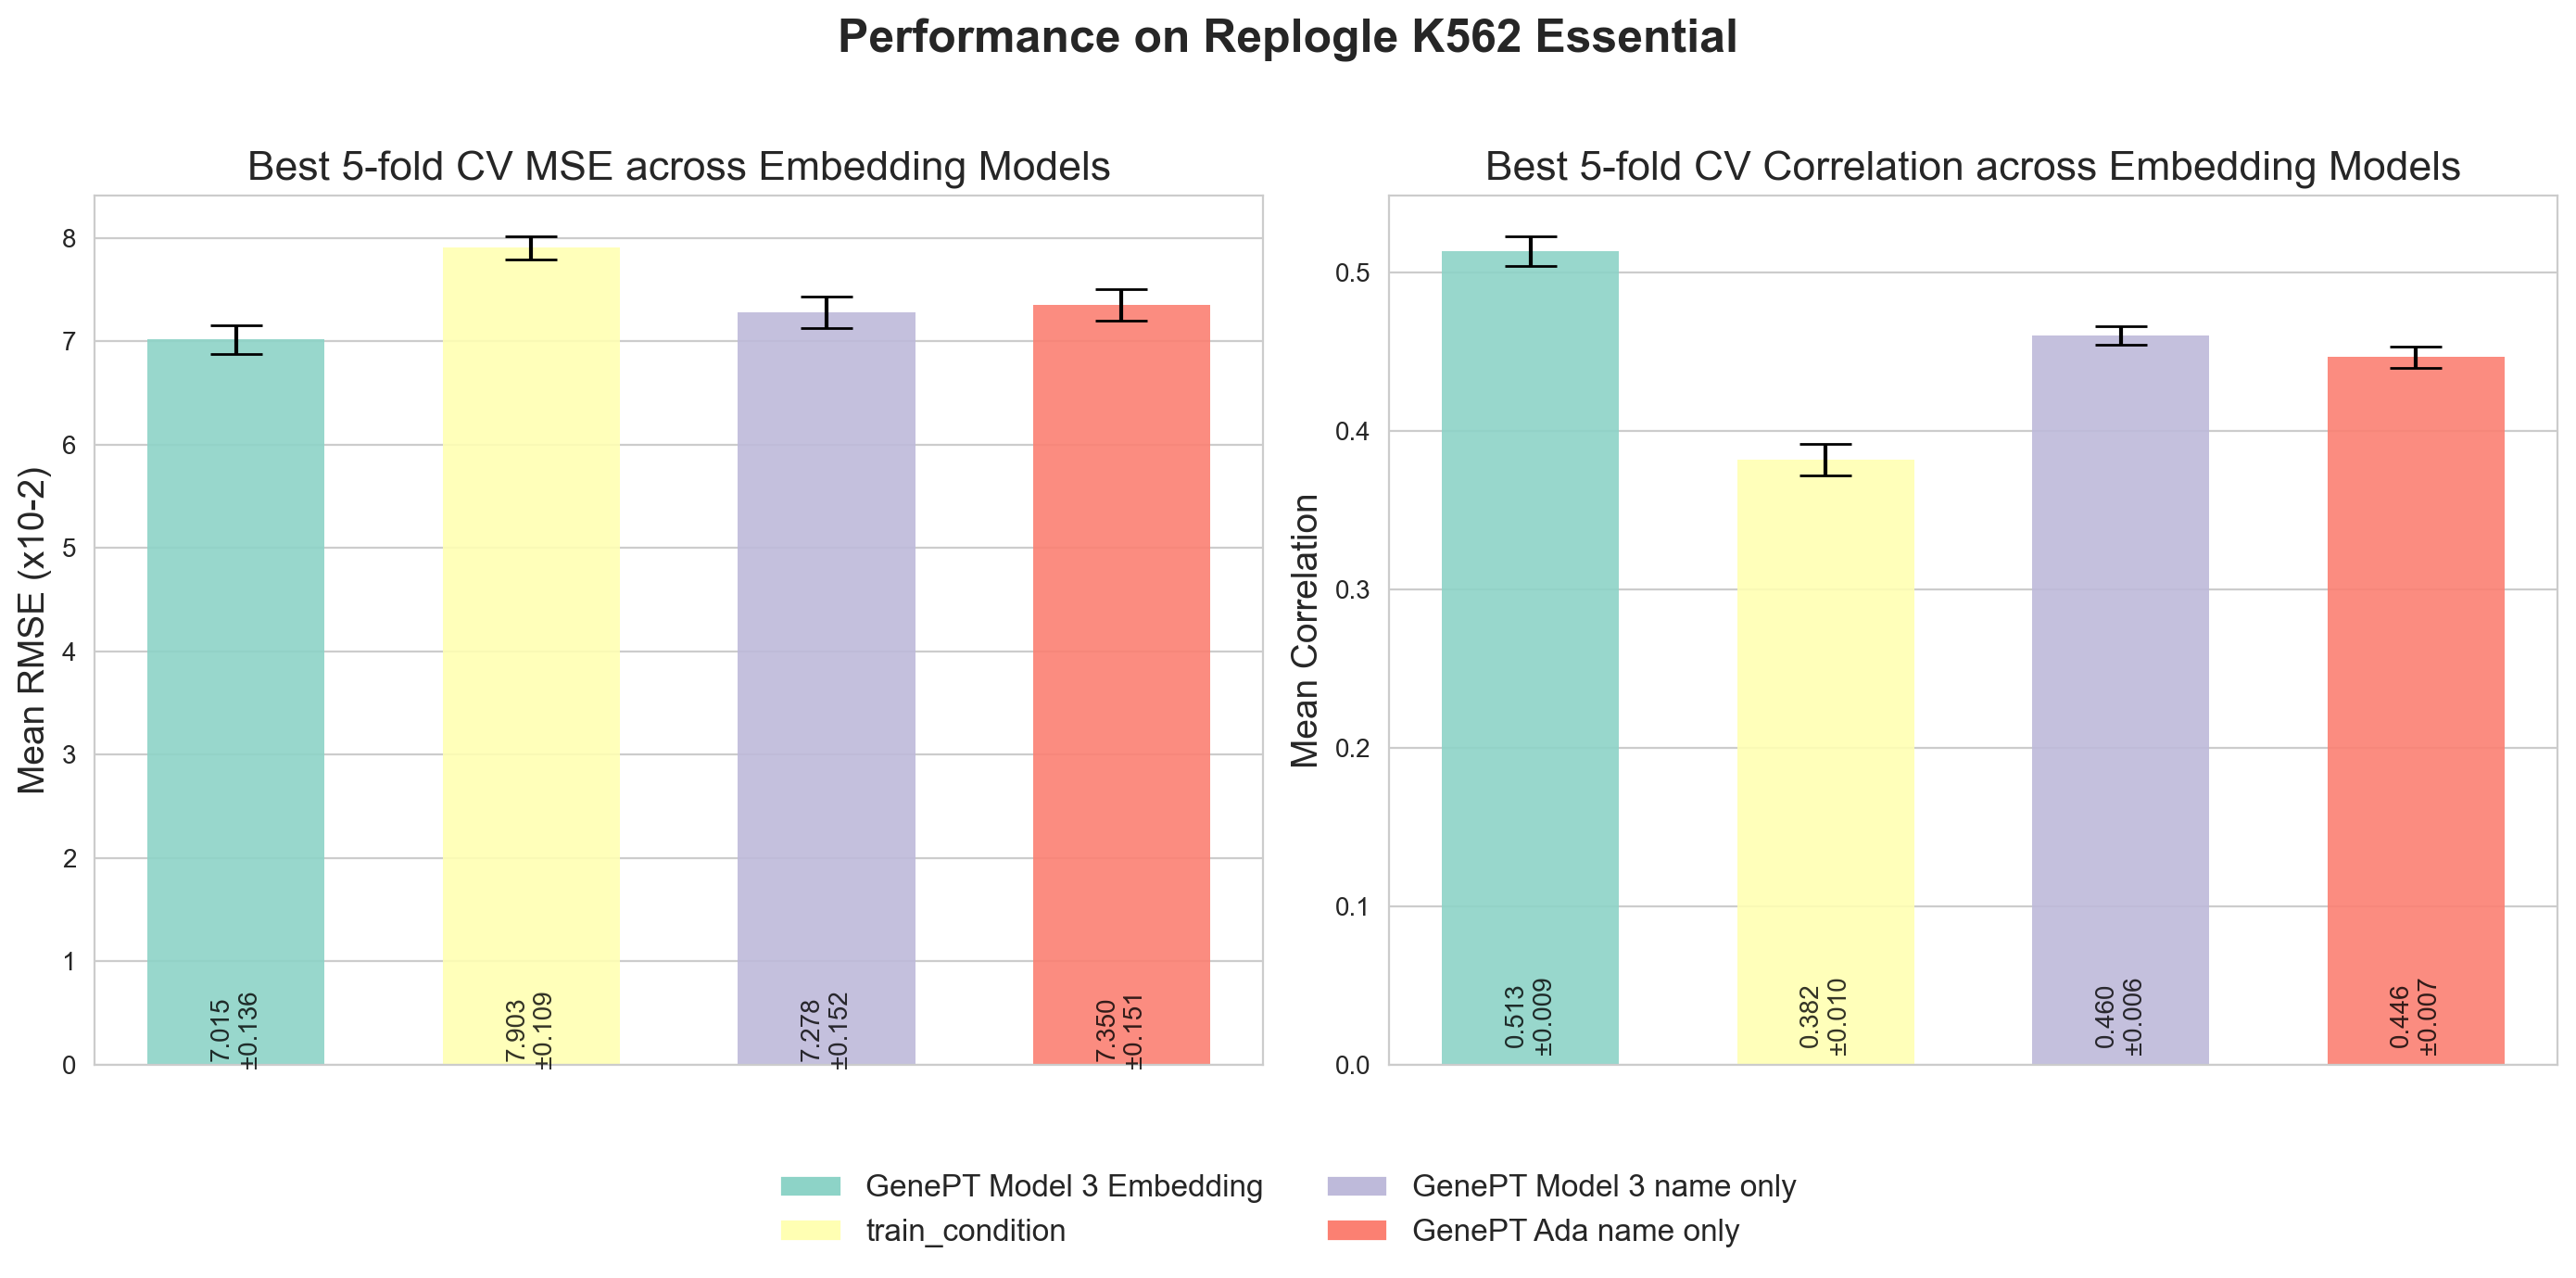

\begin{table}[ht]
\centering
\begin{tabular}{lccc}
\toprule
Dataset & Embedding & RMSE (x$10^{-2}$) & Correlation \\
\midrule
Replogle K562 Essential & GenePT Model 3 Embedding & 7.01 $\pm$ 0.14 & 0.51 $\pm$ 0.01 \\
 & train_condition & 7.90 $\pm$ 0.11 & 0.38 $\pm$ 0.01 \\
 & GenePT Model 3 name only & 7.28 $\pm$ 0.15 & 0.46 $\pm$ 0.01 \\
 & GenePT Ada name only & 7.35 $\pm$ 0.15 & 0.45 $\pm$ 0.01 \\
\bottomrule
\end{tabular}
\caption{Mean and standard deviation of RMSE (scaled) and correlation for Replogle K562 Essential.}
\end{table}


In [4]:
dataset_name = 'Replogle K562 Essential'
plot_mse_corr_comparison(results_comparison, dataset_name)

Pearson correlation between GenePT Model 3 Embedding and train_condition: 0.729
Pearson correlation between GenePT Model 3 Embedding and Geneformer: 0.316
Pearson correlation between GenePT Model 3 Embedding and scGPT: 0.358
Pearson correlation between train_condition and Geneformer: 0.373
Pearson correlation between train_condition and scGPT: 0.375
Pearson correlation between Geneformer and scGPT: 0.705


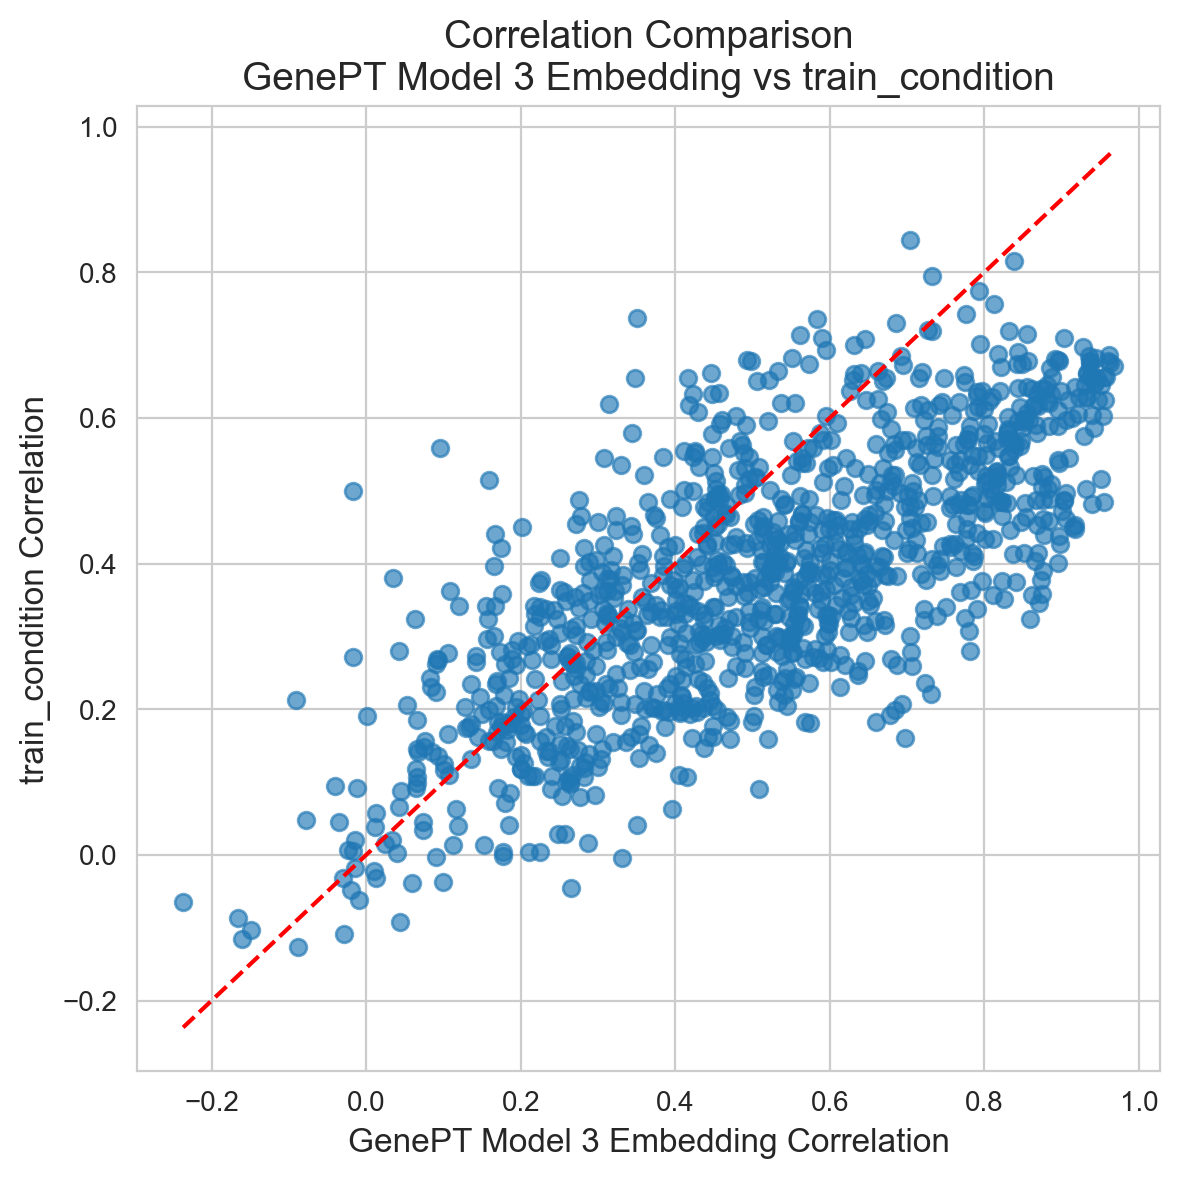

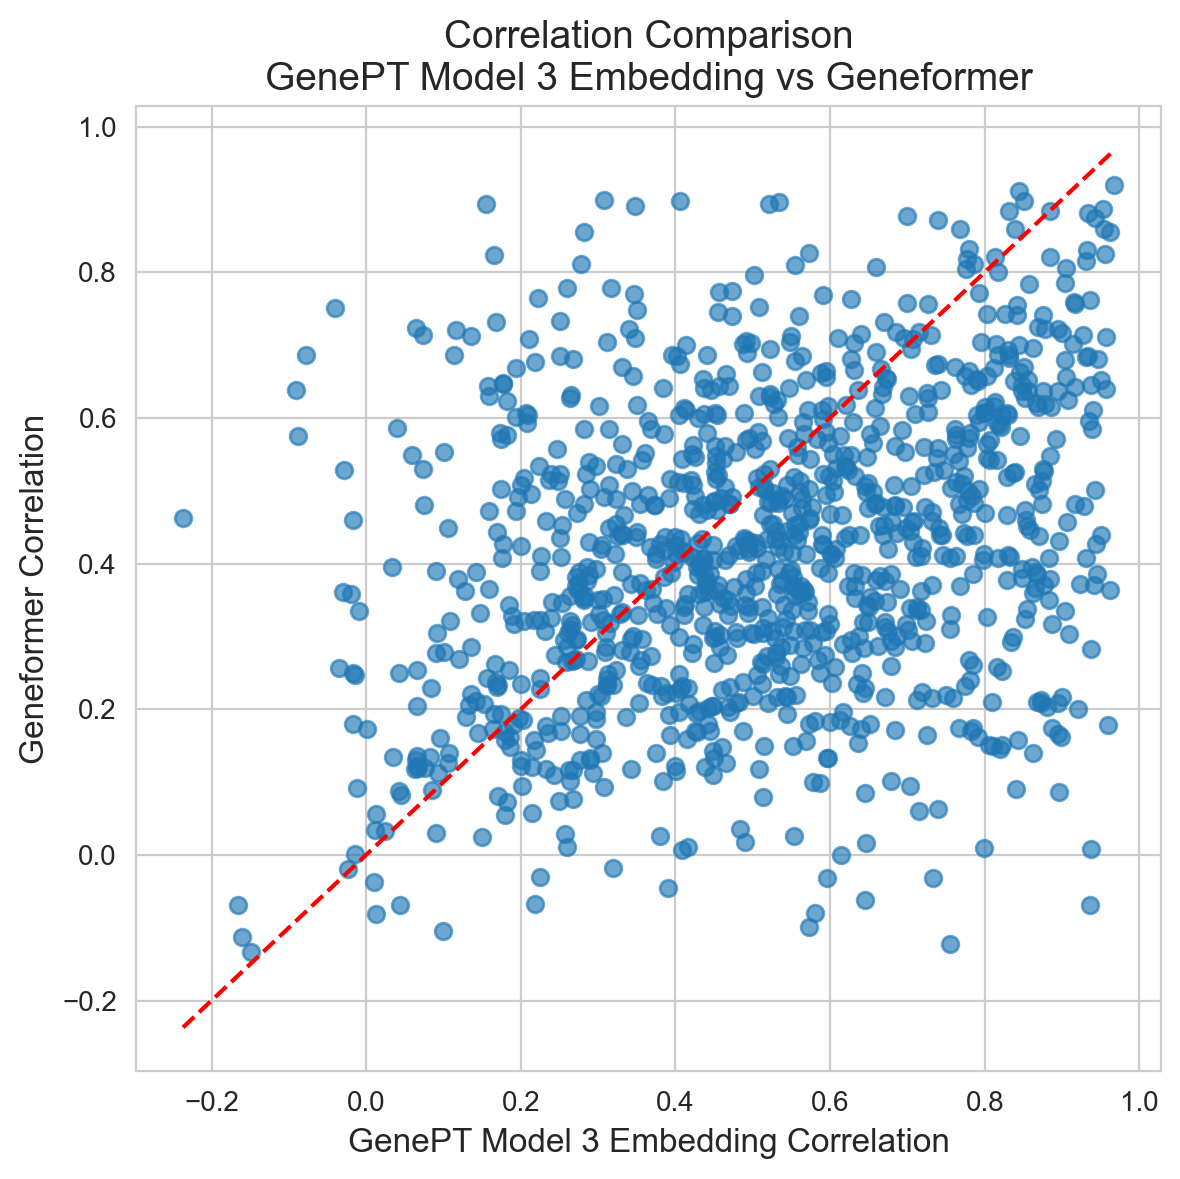

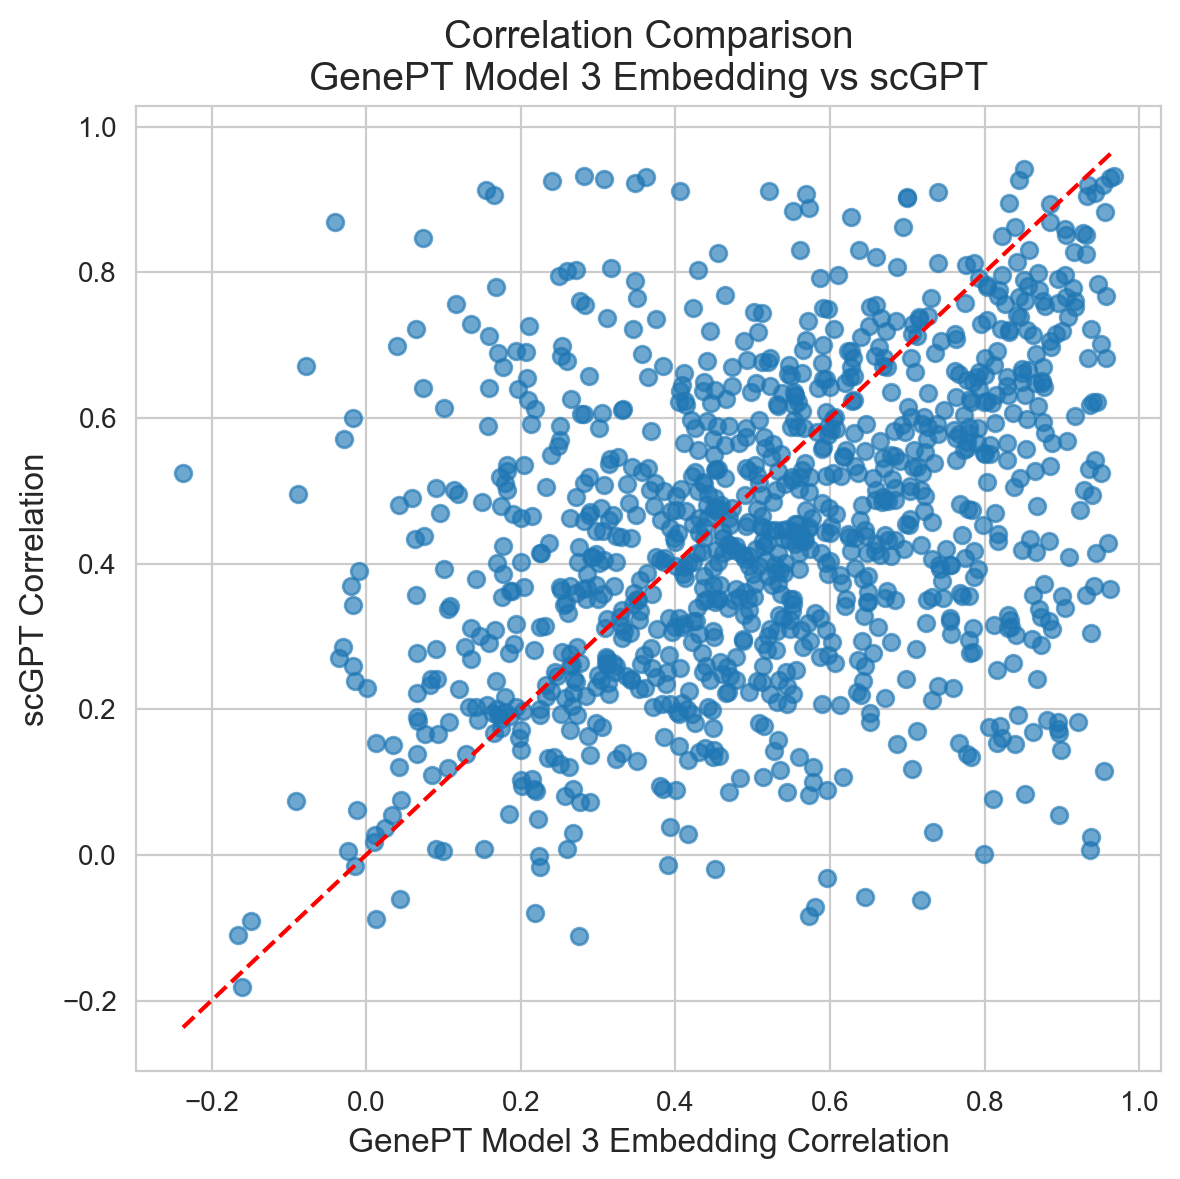

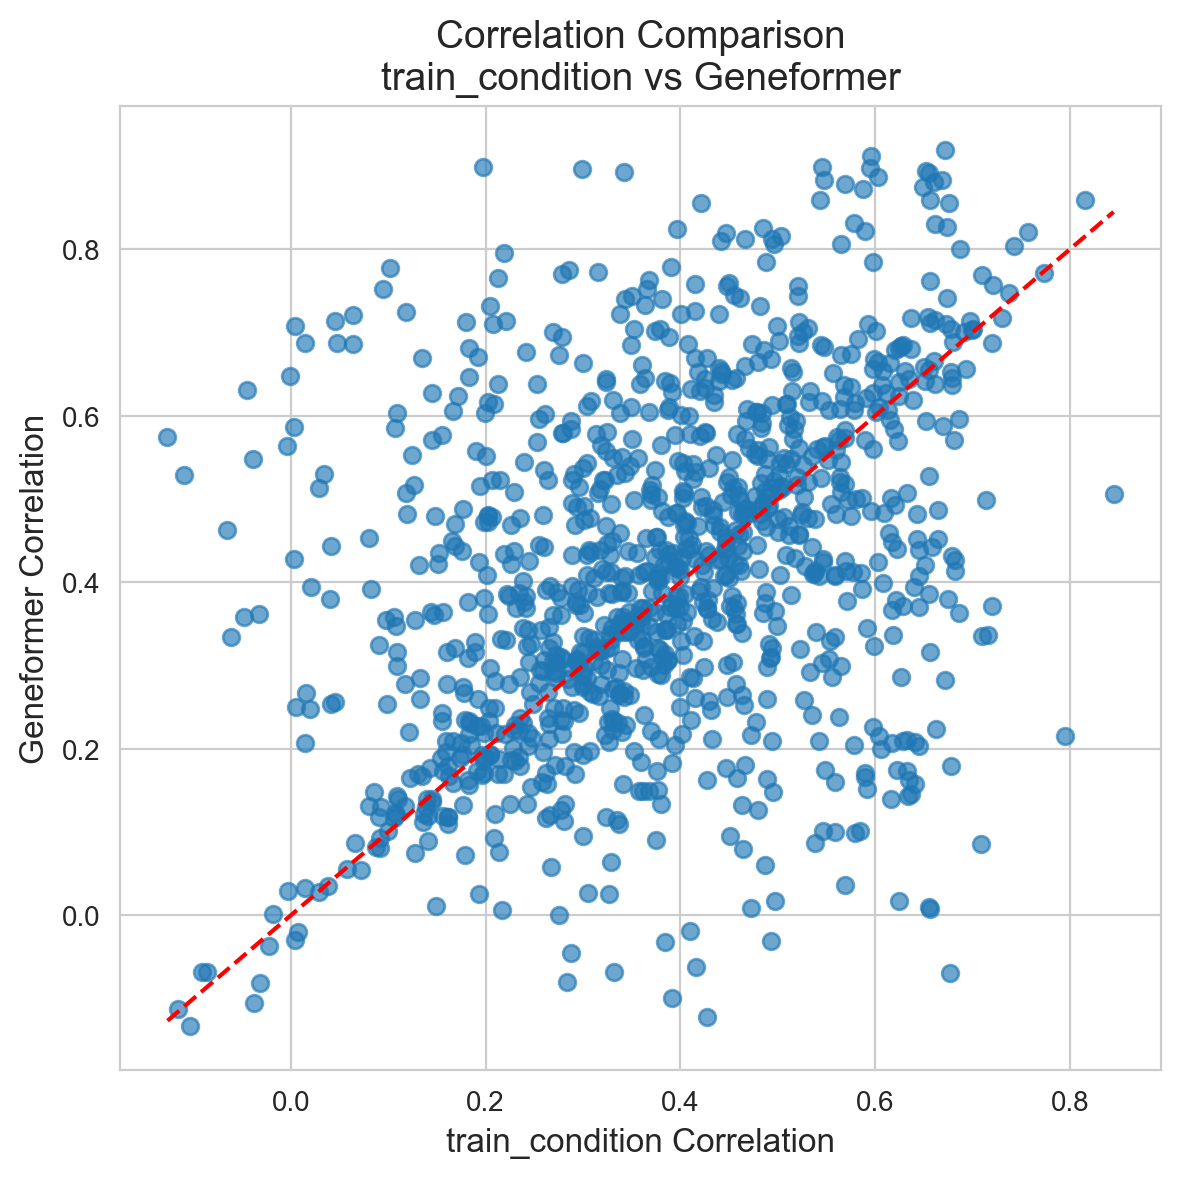

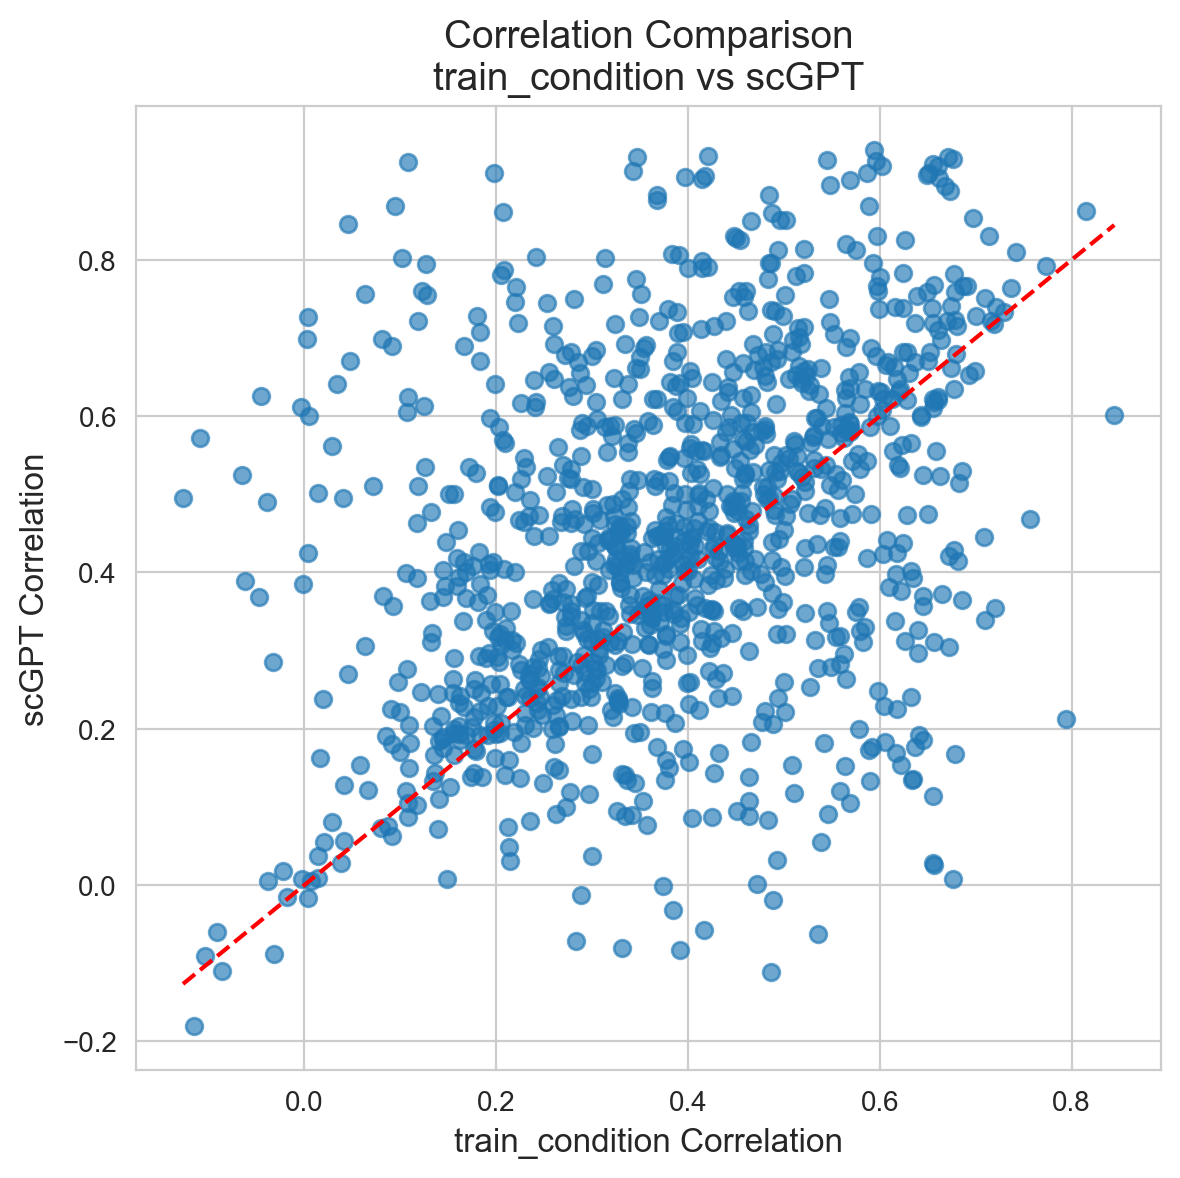

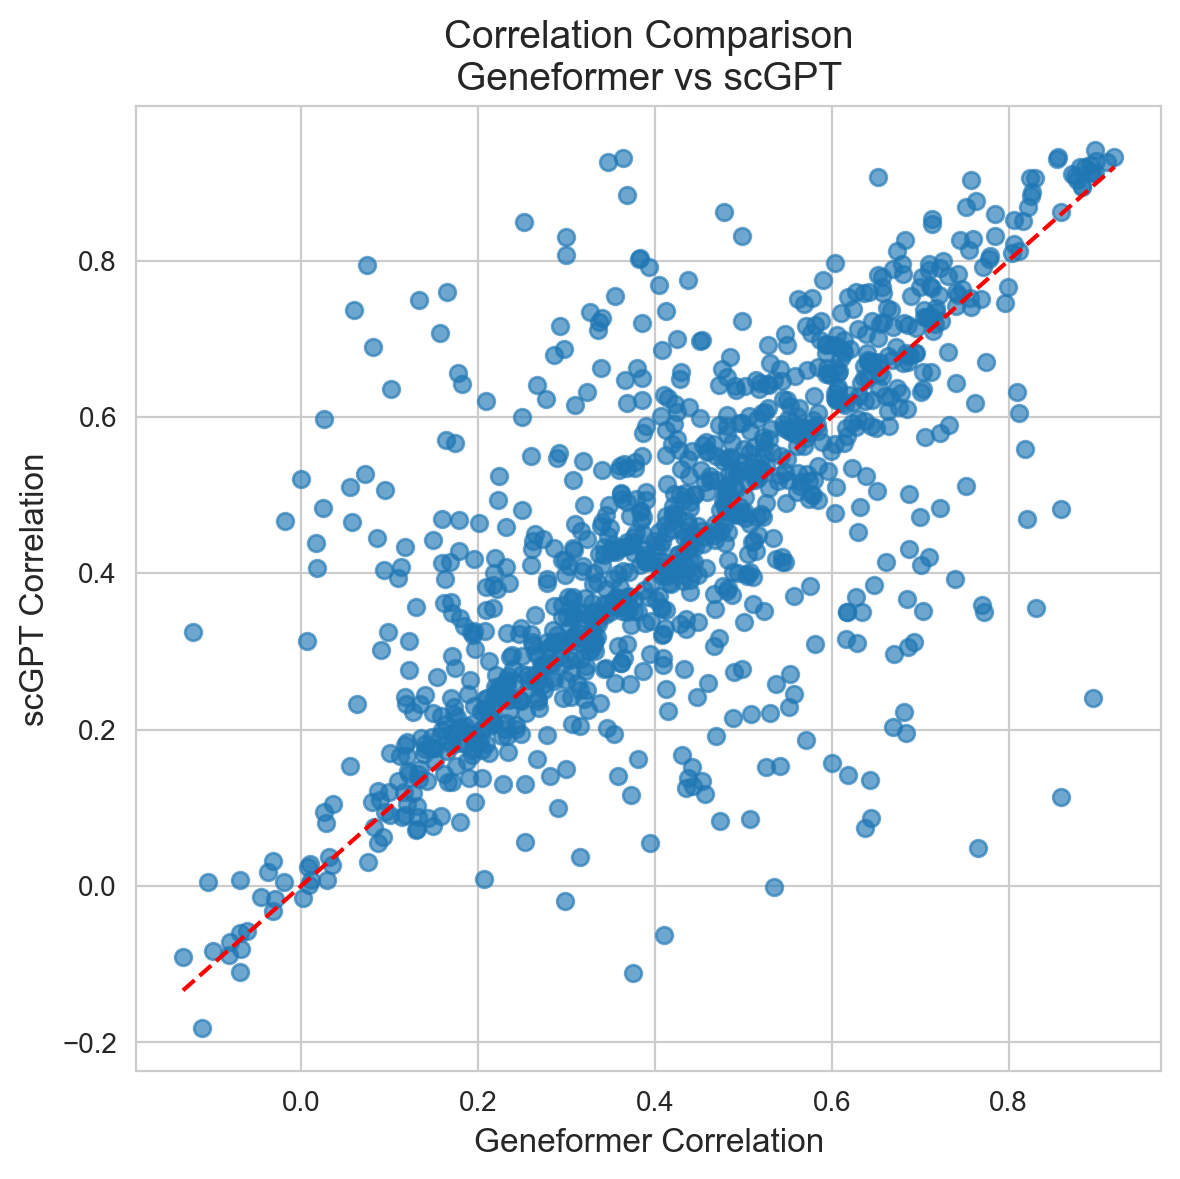

In [51]:
compare_embedding_correlations(results_comparison,output_dir='/Users/yiquntchen/Desktop/gene-embedding-perturbation/supp_fig')